In [41]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('C:\Programowanie\Python\CV Projects\SteamGames\Datasets\games.csv', encoding='utf-8')
df.head()



<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Rafal\AppData\Local\Temp\ipykernel_972\2926697434.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('C:\Programowanie\Python\CV Projects\SteamGames\Datasets\games.csv', encoding='utf-8')


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [43]:
#the columns are misaligned
corr_columns = ['Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Unnamed']

df.rename(columns=dict(zip(df.columns[:7], corr_columns)), inplace=True)


In [44]:
df.head(20)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Unnamed,DiscountDLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1469160,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,0,0,Feel tired of auto-fight? Feel tired of boring...,['English'],...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1659180,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,0,1,"TD Worlds is a dynamic, highly strategical gam...","['English', 'Russian', 'Danish']",...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1968760,Legend of Rome - The Wrath of Mars,"May 5, 2022",0 - 20000,2,0,9.99,0,0,When the Roman people honored a simple warrior...,"['English', 'German']",...,0,0,0,magnussoft,magnussoft,"Single-player,Steam Cloud",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1178150,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,0,0,'MazM: Jekyll and Hyde' is a darkly entertaini...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
320150,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,0,0,Death is lonely. He has zero friends on his Fa...,"['English', 'Polish', 'French', 'Italian', 'Ge...",...,0,782,0,ONE MORE LEVEL,

In [45]:
df['year'] = df['Release date'].str.extract(r'(\d{4})')
df.head()


,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Unnamed,DiscountDLC count,About the game,Supported languages,...,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,year
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2008
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2017
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2021
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2020


In [46]:
df.shape

(111452, 40)

<Axes: >

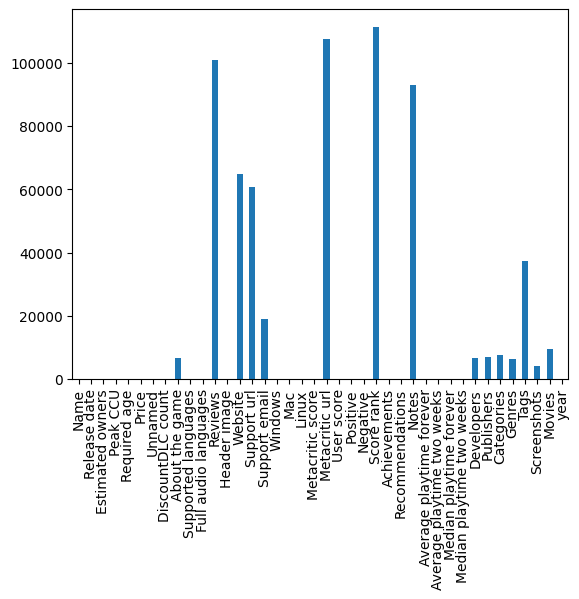

In [47]:
df.isna().sum().plot(kind='bar')

In [48]:
cols_to_drop = ['Reviews', 'Website', 'Support url', 'Support email', 'Screenshots', 'Header image', 'Support email', 'Movies', 'Notes', 'Metacritic url', 'Unnamed', 'DiscountDLC count', 'About the game', 'Score rank', 'Average playtime two weeks', 'Median playtime two weeks']
df2 = df.drop(columns=cols_to_drop)
df2.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Supported languages,Full audio languages,Windows,Mac,...,Achievements,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,year
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,['English'],[],True,False,...,30,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",2008
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,...,12,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,"['English', 'Portuguese - Brazil']",[],True,False,...,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,2021
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,...,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,"['English', 'Spanish - Spain']",[],True,True,...,17,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020


In [49]:
rows_before = df2.shape[0]
df2 = df2.dropna(subset=['Name', 'Tags', 'Genres', 'Developers', 'Publishers', 'Categories'])
rows_after = df2.shape[0]
rows_dropped = rows_before - rows_after
print(f"Rows before: {rows_before}")
print(f"Rows after: {rows_after}")
print(f"Rows dropped: {rows_dropped}")


Rows before: 111452
Rows after: 72673
Rows dropped: 38779


<Axes: >

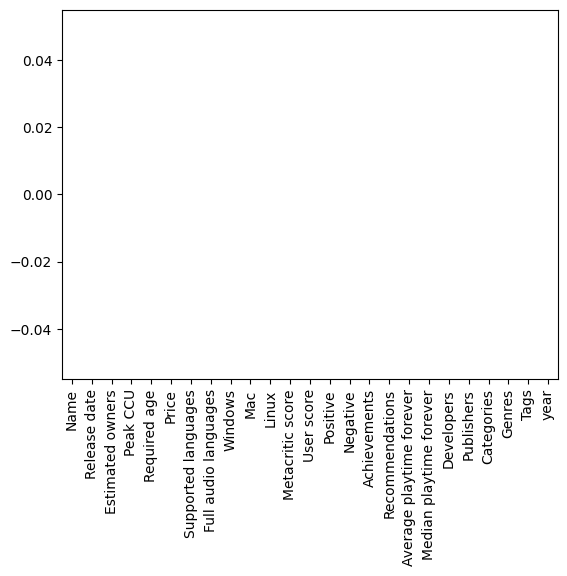

In [50]:
df2.isna().sum().plot(kind='bar')

<Axes: xlabel='year'>

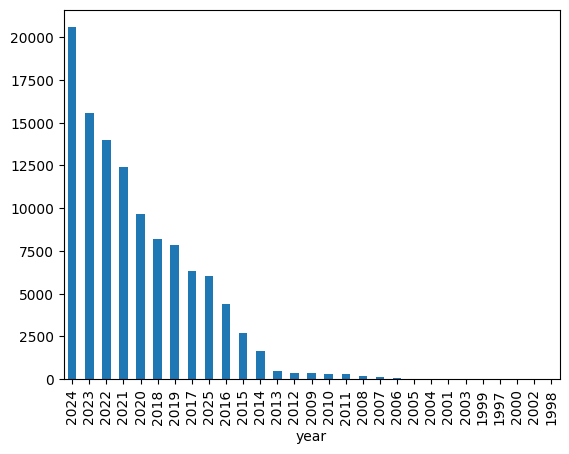

In [51]:
df['year'].value_counts().plot(kind='bar')

In [52]:
df2['year'] = df2['year'].astype(int)

<Axes: xlabel='year'>

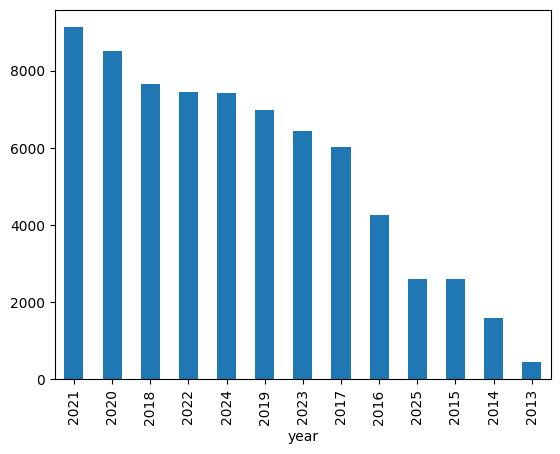

In [53]:
df2 = df2[df2['year'] > 2012]
df2['year'].value_counts().plot(kind='bar')

In [54]:
df2.shape

(71083, 25)

In [55]:
df2.drop_duplicates(inplace=True)

In [56]:
df2.reset_index(drop=True,inplace=True)
df2.head(10)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Supported languages,Full audio languages,Windows,Mac,...,Achievements,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,year
0,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,...,12,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017
1,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,True,...,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020
2,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,"['English', 'Spanish - Spain']",[],True,True,...,17,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020
3,Wartune Reborn,"Feb 26, 2021",50000 - 100000,68,0,0.00,['English'],[],True,False,...,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",2021
4,TD Worlds,"Jan 9, 2022",0 - 20000,3,0,10.99,"['English', 'Russian', 'Danish']",[],True,False,...,62,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",2022
5,MazM: Jekyll and Hyde,"Apr 2, 2020",0 - 20000,1,0,14.99,"['English', 'French', 'Italian', 'German', 'Sp...",[],True,False,...,25,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",2020
6,Deadlings: Rotten Edition,"Nov 11, 2014",50000 - 100000,0,0,3.99,"['English', 'Polish', 'French', 'Italian', 'Ge...","['English', 'Japanese']",True,True,...,32,0,703,782,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",2014
7,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,"['English', 'French', 'German', 'Polish', 'Rus...",[],True,False,...,34,427,67,93,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",2019
8,Cthulhu Realms,"Jul 1, 2016",50000 - 100000,0,0,0.00,['English'],['English'],True,True,...,0,0,224,257,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",2016
9,Clockwork Dungeon,"Aug 27, 2021",0 - 20000,0,0,1.99,['English'],[],True,False,...,25,0,0,0,Beardlings LLC,Beardlings LLC,"Single-player,Steam Achievements","Casual,Indie","Casual,Puzzle,2D,Singleplayer,Linear,Indie",2021


In [57]:
df2['Release date'] = pd.to_datetime(df2['Release date'], errors='coerce')
df2['Name'] = df2['Name'].str.strip()
df2['Genres'] = df2['Genres'].str.replace('[\[\]\']', '', regex=True)
df2['Supported languages'] = df2['Supported languages'].str.replace('[\[\]\']', '', regex=True)
df2['Full audio languages'] = df2['Full audio languages'].str.replace('[\[\]\']', '', regex=True)

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:4: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\['
C:\Users\Rafal\AppData\Local\Temp\ipykernel_972\4229695827.py:3: SyntaxWarning: invalid escape sequence '\['
  df2['Genres'] = df2['Genres'].str.replace('[\[\]\']', '', regex=True)
C:\Users\Rafal\AppData\Local\Temp\ipykernel_972\4229695827.py:4: SyntaxWarning: invalid escape sequence '\['
  df2['Supported languages'] = df2['Supported languages'].str.replace('[\[\]\']', '', regex=True)
C:\Users\Rafal\AppData\Local\Temp\ipykernel_972\4229695827.py:5: SyntaxWarning: invalid escape sequence '\['
  df2['Full audio languages'] = df2['Full audio languages'].str.replace('[\[\]\']', '', regex=True)
C:\Users\Rafal\AppData\Local\Temp\ipykernel_972\4229695827.py:1: UserWarning: Could not infer format, s

In [58]:

df2['Full audio languages'] = df2['Full audio languages'].str.strip()
df2['Full audio languages'] = df2['Full audio languages'].replace(['', '[]'], np.nan)


In [59]:
df2.info()
df2.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71083 entries, 0 to 71082
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      71083 non-null  object        
 1   Release date              71083 non-null  datetime64[ns]
 2   Estimated owners          71083 non-null  object        
 3   Peak CCU                  71083 non-null  int64         
 4   Required age              71083 non-null  int64         
 5   Price                     71083 non-null  float64       
 6   Supported languages       71083 non-null  object        
 7   Full audio languages      32100 non-null  object        
 8   Windows                   71083 non-null  bool          
 9   Mac                       71083 non-null  bool          
 10  Linux                     71083 non-null  bool          
 11  Metacritic score          71083 non-null  int64         
 12  User score        

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Supported languages,Full audio languages,Windows,Mac,...,Achievements,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,year
0,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,True,...,12,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017
1,Henosis™,2020-07-23,0 - 20000,0,0,5.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,True,...,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020
2,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,"English, Spanish - Spain",NaN,True,True,...,17,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020
3,Wartune Reborn,2021-02-26,50000 - 100000,68,0,0.00,English,NaN,True,False,...,0,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",2021
4,TD Worlds,2022-01-09,0 - 20000,3,0,10.99,"English, Russian, Danish",NaN,True,False,...,62,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",2022
5,MazM: Jekyll and Hyde,2020-04-02,0 - 20000,1,0,14.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,False,...,25,0,0,0,Growing Seeds,"CFK Co., Ltd.","Single-player,Steam Achievements,Full controll...","Adventure,RPG,Simulation,Strategy","Adventure,Simulation,RPG,Strategy,Singleplayer...",2020
6,Deadlings: Rotten Edition,2014-11-11,50000 - 100000,0,0,3.99,"English, Polish, French, Italian, German, Span...","English, Japanese",True,True,...,32,0,703,782,ONE MORE LEVEL,ONE MORE LEVEL,"Single-player,Steam Achievements,Steam Trading...","Action,Adventure,Indie","Action,Indie,Adventure,Puzzle-Platformer,Arcad...",2014
7,WARSAW,2019-10-02,20000 - 50000,5,0,23.99,"English, French, German, Polish, Russian",NaN,True,False,...,34,427,67,93,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...","Indie,RPG","Tactical RPG,Turn-Based Strategy,Wargame,Histo...",2019
8,Cthulhu Realms,2016-07-01,50000 - 100000,0,0,0.00,English,English,True,True,...,0,0,224,257,"Wise Wizard Games, LLC","Wise Wizard Games, LLC","Single-player,Multi-player,Shared/Split Screen...",Strategy,"Card Game,Strategy,Deckbuilding,Lovecraftian,B...",2016
9,Clockwork Dungeon,2021-08-27,0 - 20000,0,0,1.99,English,NaN,True,False,...,25,0,0,0,Beardlings LLC,Beardlings LLC,"Single-player,Steam Achievements","Casual,Indie","Casual,Puzzle,2D,Singleplayer,Linear,Indie",2021


In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71083 entries, 0 to 71082
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      71083 non-null  object        
 1   Release date              71083 non-null  datetime64[ns]
 2   Estimated owners          71083 non-null  object        
 3   Peak CCU                  71083 non-null  int64         
 4   Required age              71083 non-null  int64         
 5   Price                     71083 non-null  float64       
 6   Supported languages       71083 non-null  object        
 7   Full audio languages      32100 non-null  object        
 8   Windows                   71083 non-null  bool          
 9   Mac                       71083 non-null  bool          
 10  Linux                     71083 non-null  bool          
 11  Metacritic score          71083 non-null  int64         
 12  User score        

In [61]:
df2.describe()

,Release date,Peak CCU,Required age,Price,Metacritic score,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Median playtime forever,year
count,71083,7.108300e+04,71083.000000,71083.000000,71083.000000,71083.000000,7.108300e+04,71083.000000,71083.000000,7.108300e+04,71083.000000,71083.000000,71083.000000
mean,2020-07-20 19:07:11.444930560,2.578989e+02,0.281882,8.075433,3.093721,0.047677,9.244905e+02,170.370919,23.367106,7.753603e+02,107.416527,94.863118,2020.042078
min,2013-01-07 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2013.000000
25%,2018-05-16 00:00:00,0.000000e+00,0.000000,1.990000,0.000000,0.000000,3.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000,2018.000000
50%,2020-09-29 00:00:00,0.000000e+00,0.000000,4.990000,0.000000,0.000000,1.400000e+01,3.000000,6.000000,0.000000e+00,0.000000,0.000000,2020.000000
75%,2022-10-13 00:00:00,1.000000e+00,0.000000,9.990000,0.000000,0.000000,6.800000e+01,19.000000,21.000000,0.000000e+00,0.000000,0.000000,2022.000000
max,2025-04-19 00:00:00,1.311366e+06,21.000000,999.000000,97.000000,100.000000,1.477153e+06,895978.000000,9821.000000,1.616422e+06,90351.000000,136629.000000,2025.000000
std,NaN,1.002517e+04,2.129871,10.810971,14.830836,1.959601,1.405752e+04,4077.940091,187.216745,1.384471e+04,969.094712,1219.605504,2.867111


In [62]:
df2['GameID'] = df2.index


In [63]:
df2.head(5)

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Supported languages,Full audio languages,Windows,Mac,...,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,year,GameID
0,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,True,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017,0
1,Henosis™,2020-07-23,0 - 20000,0,0,5.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,True,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020,1
2,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,"English, Spanish - Spain",NaN,True,True,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020,2
3,Wartune Reborn,2021-02-26,50000 - 100000,68,0,0.00,English,NaN,True,False,...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",2021,3
4,TD Worlds,2022-01-09,0 - 20000,3,0,10.99,"English, Russian, Danish",NaN,True,False,...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",2022,4


In [64]:
df2.head()

,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Supported languages,Full audio languages,Windows,Mac,...,Recommendations,Average playtime forever,Median playtime forever,Developers,Publishers,Categories,Genres,Tags,year,GameID
0,Train Bandit,2017-10-12,0 - 20000,0,0,0.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,True,...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",2017,0
1,Henosis™,2020-07-23,0 - 20000,0,0,5.99,"English, French, Italian, German, Spanish - Sp...",NaN,True,True,...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",2020,1
2,Two Weeks in Painland,2020-02-03,0 - 20000,0,0,0.00,"English, Spanish - Spain",NaN,True,True,...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",2020,2
3,Wartune Reborn,2021-02-26,50000 - 100000,68,0,0.00,English,NaN,True,False,...,0,0,0,7Road,7Road,"Single-player,Multi-player,MMO,PvP,Online PvP,...","Adventure,Casual,Free to Play,Massively Multip...","Turn-Based Combat,Massively Multiplayer,Multip...",2021,3
4,TD Worlds,2022-01-09,0 - 20000,3,0,10.99,"English, Russian, Danish",NaN,True,False,...,0,0,0,MAKSIM VOLKAU,MAKSIM VOLKAU,"Single-player,Steam Achievements,Steam Cloud","Indie,Strategy","Tower Defense,Rogue-lite,RTS,Replay Value,Perm...",2022,4


In [ ]:
#Explode columns for relational tables
columns_to_explode = [
    ('Categories', 'steam_games_categories.csv'),
    ('Genres', 'steam_games_genres.csv'),
    ('Tags', 'steam_games_tags.csv'),
    ('Supported languages', 'steam_games_languages.csv')
]

for col, filename in columns_to_explode:
    temp_df = df2.copy()
    temp_df[col] = temp_df[col].astype(str).str.split(',')
    exploded = temp_df.explode(col)
    exploded[col] = exploded[col].str.strip()
    exploded = exploded[exploded[col].notna() & (exploded[col] != '')]
    out_df = exploded[['GameID', col]]
    out_df.to_csv(f'C:\\Programowanie\\Python\\CV Projects\\SteamGames\\Datasets\\{filename}', index=False)


# EDA

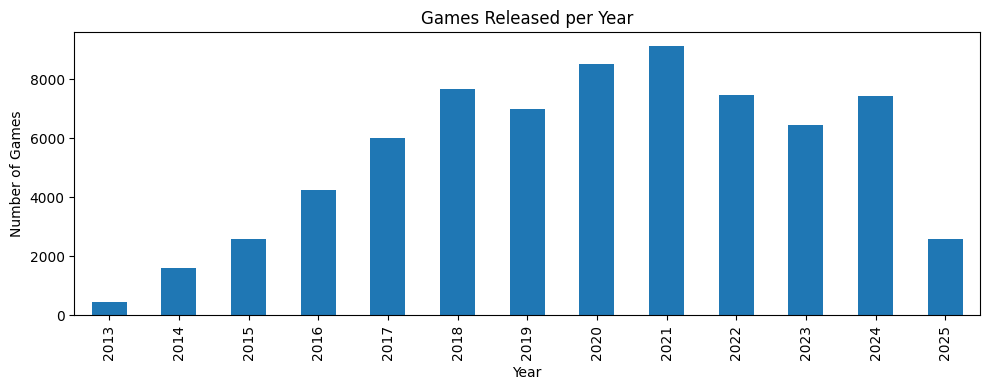

In [66]:
# Games released per year
plt.figure(figsize=(10,4))
df2['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.tight_layout()
plt.show()

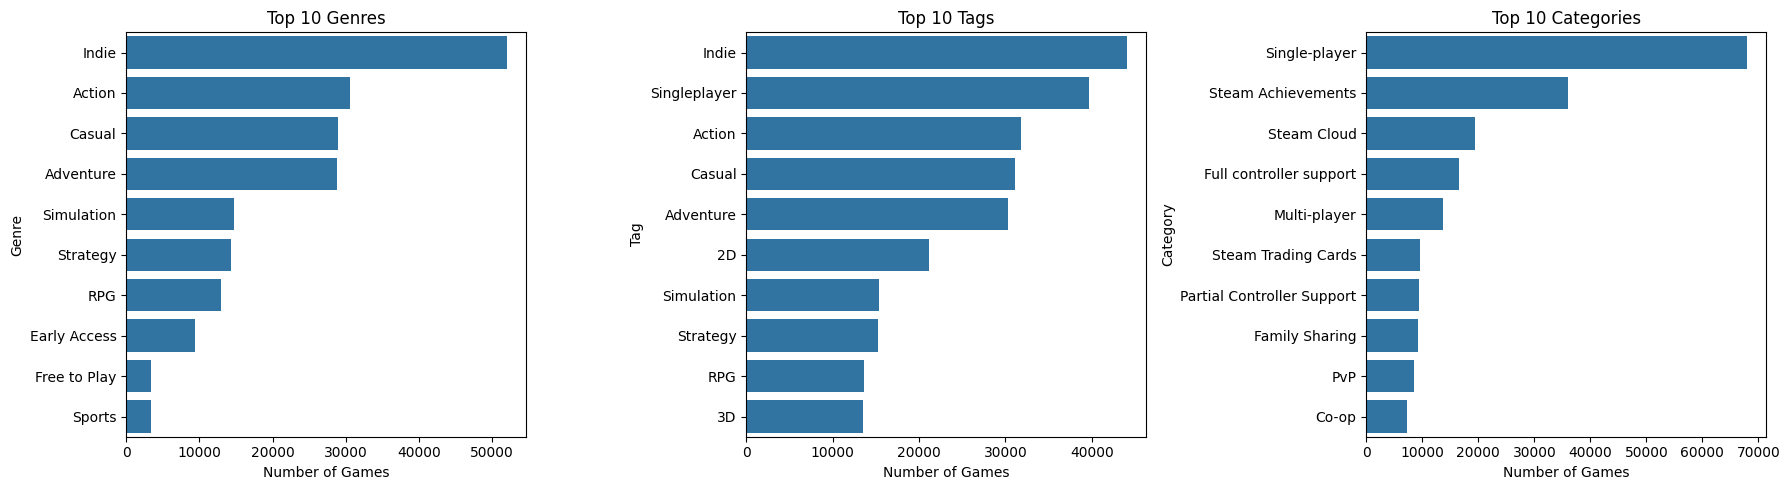

In [ ]:
#top 10 genres, tags, and categories

def get_top_items(df, column, top_n=10):
    return (df[column]
            .astype(str)
            .str.split(',')
            .explode()
            .str.strip()
            .value_counts()
            .head(top_n))

top_genres = get_top_items(df2, 'Genres')
top_tags = get_top_items(df2, 'Tags')
top_categories = get_top_items(df2, 'Categories')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x=top_genres.values, y=top_genres.index, ax=axes[0])
axes[0].set_title('Top 10 Genres')
axes[0].set_xlabel('Number of Games')
axes[0].set_ylabel('Genre')

sns.barplot(x=top_tags.values, y=top_tags.index, ax=axes[1])
axes[1].set_title('Top 10 Tags')
axes[1].set_xlabel('Number of Games')
axes[1].set_ylabel('Tag')

sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[2])
axes[2].set_title('Top 10 Categories')
axes[2].set_xlabel('Number of Games')
axes[2].set_ylabel('Category')

plt.tight_layout()
plt.show()


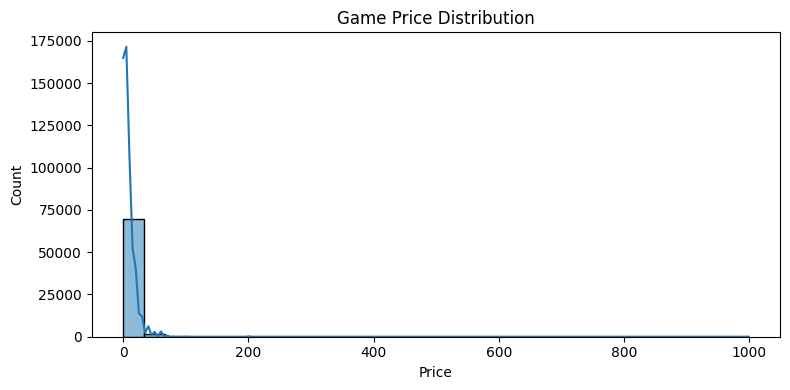

In [ ]:
#Price distribution
plt.figure(figsize=(8,4))
sns.histplot(df2['Price'].dropna(), bins=30, kde=True)
plt.title('Game Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

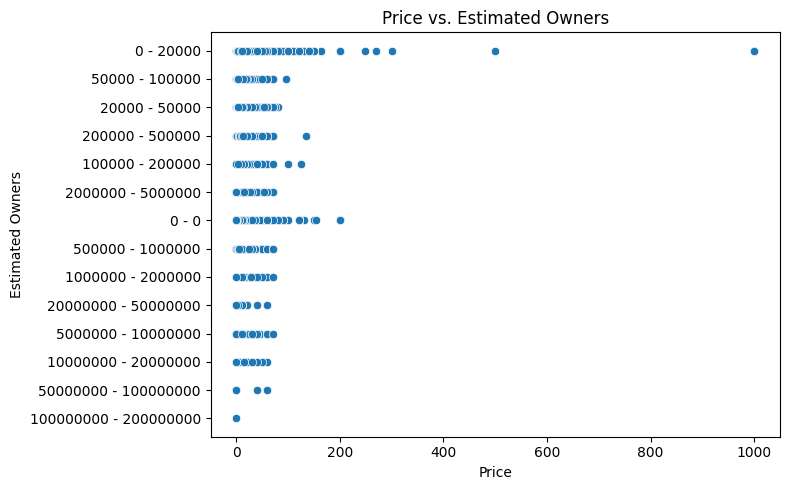

In [70]:
if 'Estimated owners' in df2.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='Price', y='Estimated owners', data=df)
    plt.title('Price vs. Estimated Owners')
    plt.xlabel('Price')
    plt.ylabel('Estimated Owners')
    plt.tight_layout()
    plt.show()

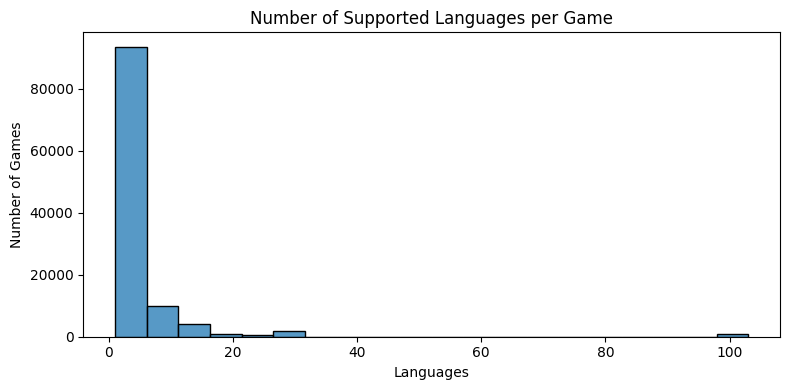

In [76]:
if 'Supported languages' in df2.columns:
    df2['LangCount'] = df2['Supported languages'].apply(lambda x: len(str(x).split(',')))
    plt.figure(figsize=(8,4))
    sns.histplot(df['LangCount'], bins=20, kde=False)
    plt.title('Number of Supported Languages per Game')
    plt.xlabel('Languages')
    plt.ylabel('Number of Games')
    plt.tight_layout()
    plt.show()

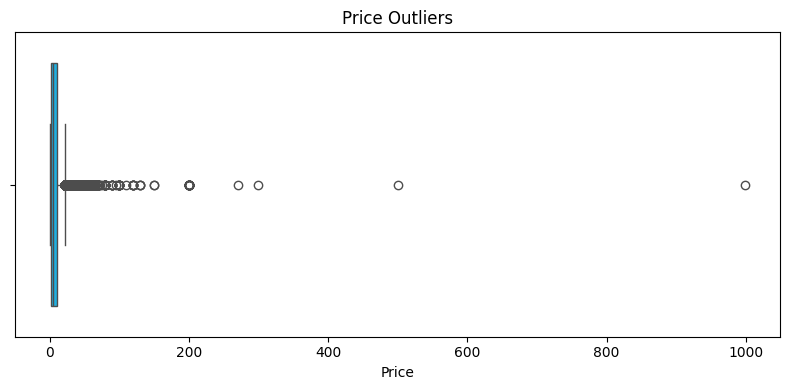

In [ ]:
#Price Outliers

plt.figure(figsize=(8, 4))
sns.boxplot(x=df2['Price'], color='deepskyblue')
plt.title('Price Outliers')
plt.xlabel('Price')
plt.tight_layout()
plt.show()

C:\Users\Rafal\AppData\Local\Temp\ipykernel_972\3142980014.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_devs.values, y=top_devs.index, palette='crest')


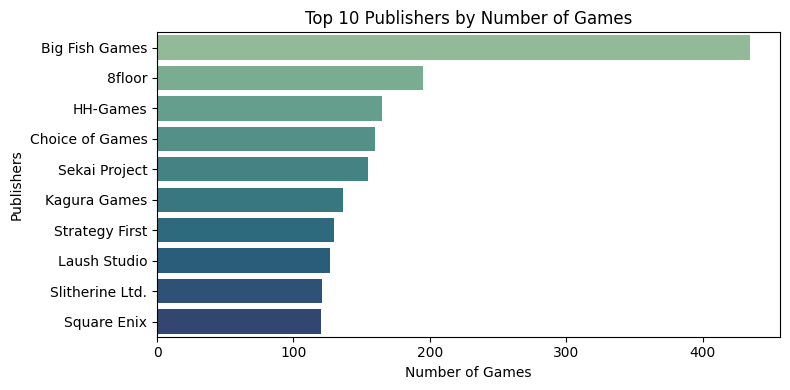

In [ ]:
#Top 10 developers by number of games
top_devs = df2['Publishers'].explode().str.strip().value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_devs.values, y=top_devs.index, palette='crest')
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Publishers')
plt.tight_layout()
plt.show()


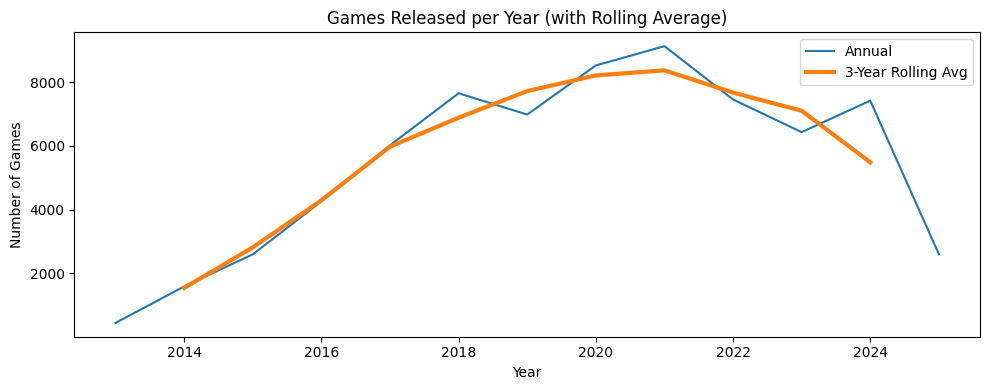

In [ ]:
#Average of games released per year
games_per_year = df2.groupby('year').size()
rolling = games_per_year.rolling(window=3, center=True).mean()

plt.figure(figsize=(10,4))
plt.plot(games_per_year.index, games_per_year.values, label='Annual')
plt.plot(rolling.index, rolling.values, label='3-Year Rolling Avg', linewidth=3)
plt.title('Games Released per Year (with Rolling Average)')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend()
plt.tight_layout()
plt.show()
